<a href="https://colab.research.google.com/github/Shivachikkonda02/-Bank-Marketing-Analysis-and-Classification-ML-Project/blob/main/Calculating-credit-worthiness-for-rural-India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the data
data=pd.read_csv("/content/trainingData .csv")
data.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [3]:
data.shape

(40000, 21)

In [4]:
data.size

840000

In [5]:
data.columns

Index(['Id', 'city', 'age', 'sex', 'social_class', 'primary_business',
       'secondary_business', 'annual_income', 'monthly_expenses',
       'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house',
       'occupants_count', 'house_area', 'sanitary_availability',
       'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments',
       'loan_amount'],
      dtype='object')

In [6]:
data.dtypes

Id                         int64
city                      object
age                        int64
sex                       object
social_class              object
primary_business          object
secondary_business        object
annual_income            float64
monthly_expenses         float64
old_dependents             int64
young_dependents           int64
home_ownership           float64
type_of_house             object
occupants_count            int64
house_area               float64
sanitary_availability    float64
water_availabity         float64
loan_purpose              object
loan_tenure                int64
loan_installments          int64
loan_amount              float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     40000 non-null  int64  
 1   city                   38136 non-null  object 
 2   age                    40000 non-null  int64  
 3   sex                    40000 non-null  object 
 4   social_class           34745 non-null  object 
 5   primary_business       39974 non-null  object 
 6   secondary_business     34759 non-null  object 
 7   annual_income          40000 non-null  float64
 8   monthly_expenses       39880 non-null  float64
 9   old_dependents         40000 non-null  int64  
 10  young_dependents       40000 non-null  int64  
 11  home_ownership         39621 non-null  float64
 12  type_of_house          39306 non-null  object 
 13  occupants_count        40000 non-null  int64  
 14  house_area             40000 non-null  float64
 15  sa

In [8]:
data.describe()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
count,40000.00000,40000.00000,4.000000e+04,39880.000000,40000.000000,40000.00000,39621.000000,40000.000000,40000.000000,39792.000000,34747.000000,40000.000000,40000.000000,4.000000e+04
mean,20000.50000,55.15990,3.764021e+04,3810.875401,0.044900,1.13710,0.972489,26.641000,552.804750,0.686369,0.753216,12.032225,21.761175,8.412593e+03
std,11547.14972,3830.35566,2.873912e+04,4592.958009,0.222003,1.07384,0.163568,4749.995485,4596.921905,0.464028,0.255337,1.367473,16.682458,1.359694e+04
min,1.00000,2.00000,0.000000e+00,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,-1.000000,3.000000,0.000000,1.000000e+02
25%,10000.75000,29.00000,1.440000e+04,2500.000000,0.000000,0.00000,1.000000,2.000000,200.000000,0.000000,0.500000,12.000000,12.000000,5.000000e+03
50%,20000.50000,35.00000,3.600000e+04,3500.000000,0.000000,1.00000,1.000000,3.000000,400.000000,1.000000,1.000000,12.000000,12.000000,8.000000e+03
75%,30000.25000,42.00000,5.600000e+04,4000.000000,0.000000,2.00000,1.000000,4.000000,600.000000,1.000000,1.000000,12.000000,50.000000,1.000000e+04
max,40000.00000,766105.00000,1.200000e+06,240000.000000,3.000000,7.00000,1.000000,950000.000000,700000.000000,1.000000,1.000000,84.000000,84.000000,1.343000e+06


In [9]:
# Checking null values
data.isna().sum()

Id                          0
city                     1864
age                         0
sex                         0
social_class             5255
primary_business           26
secondary_business       5241
annual_income               0
monthly_expenses          120
old_dependents              0
young_dependents            0
home_ownership            379
type_of_house             694
occupants_count             0
house_area                  0
sanitary_availability     208
water_availabity         5253
loan_purpose               26
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64

In [10]:
#Calculating missing value in percentage
(data.isna().sum()/40000)*100

Id                        0.0000
city                      4.6600
age                       0.0000
sex                       0.0000
social_class             13.1375
primary_business          0.0650
secondary_business       13.1025
annual_income             0.0000
monthly_expenses          0.3000
old_dependents            0.0000
young_dependents          0.0000
home_ownership            0.9475
type_of_house             1.7350
occupants_count           0.0000
house_area                0.0000
sanitary_availability     0.5200
water_availabity         13.1325
loan_purpose              0.0650
loan_tenure               0.0000
loan_installments         0.0000
loan_amount               0.0000
dtype: float64

**Exploratory Data Analysis**

**1.Personal Details: city, age, sex, social_class**

In [13]:
personal_data = pd.DataFrame(data, columns=["city", "age", "sex", "social_class"])
personal_data.head()

,city,age,sex,social_class
0,Dhanbad,22,F,Mochi
1,Manjapra,21,F,OBC
2,Dhanbad,24,M,Nai
3,NaN,26,F,OBC
4,Nuapada,23,F,OBC


In [14]:
personal_data.describe()

,age
count,40000.00000
mean,55.15990
std,3830.35566
min,2.00000
25%,29.00000
50%,35.00000
75%,42.00000
max,766105.00000


In [15]:
personal_data.isna().sum()

city            1864
age                0
sex                0
social_class    5255
dtype: int64

In [16]:
personal_data.count()

city            38136
age             40000
sex             40000
social_class    34745
dtype: int64

<Axes: xlabel='sex', ylabel='count'>

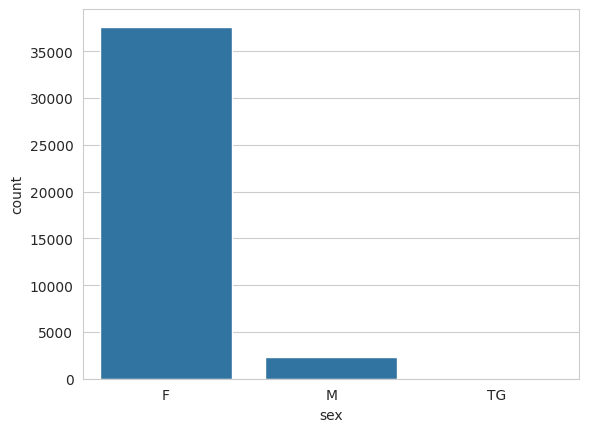

In [20]:
#categorical features
sns.countplot(data=personal_data, x='sex')

In [22]:
data1=personal_data[(personal_data['sex']=='M')].count()
data1

city            2193
age             2371
sex             2371
social_class    2278
dtype: int64

In [24]:
data1=personal_data[(personal_data['sex']=='F')].count()
data1

city            35938
age             37622
sex             37622
social_class    32460
dtype: int64

In [26]:
data1=personal_data[(personal_data['sex']=='TG')].count()
data1

city            5
age             7
sex             7
social_class    7
dtype: int64

**2.Financial Details**

In [28]:
#Financial Details: primary_business, secondary_business, annual_income, monthly_expenses,
#old_dependents, young_dependents
financial_details_data=pd.DataFrame(data,columns=["primary_business","secondary_business","annual_income","monthly_expenses",
                                                 "old_dependents","young_dependents"])
financial_details_data.head()

,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents
0,Tailoring,Others,36000.0,5000.0,0,2
1,Tailoring,none,94000.0,3600.0,1,1
2,Beauty salon,Others,48000.0,4000.0,0,2
3,Tailoring,none,7000.0,5000.0,0,2
4,General store,Agriculture,36000.0,3500.0,0,0


In [30]:
financial_details_data.describe()

,annual_income,monthly_expenses,old_dependents,young_dependents
count,4.000000e+04,39880.000000,40000.000000,40000.00000
mean,3.764021e+04,3810.875401,0.044900,1.13710
std,2.873912e+04,4592.958009,0.222003,1.07384
min,0.000000e+00,2.000000,0.000000,0.00000
25%,1.440000e+04,2500.000000,0.000000,0.00000
50%,3.600000e+04,3500.000000,0.000000,1.00000
75%,5.600000e+04,4000.000000,0.000000,2.00000
max,1.200000e+06,240000.000000,3.000000,7.00000


In [31]:
financial_details_data.isna().sum()

primary_business        26
secondary_business    5241
annual_income            0
monthly_expenses       120
old_dependents           0
young_dependents         0
dtype: int64

<Axes: >

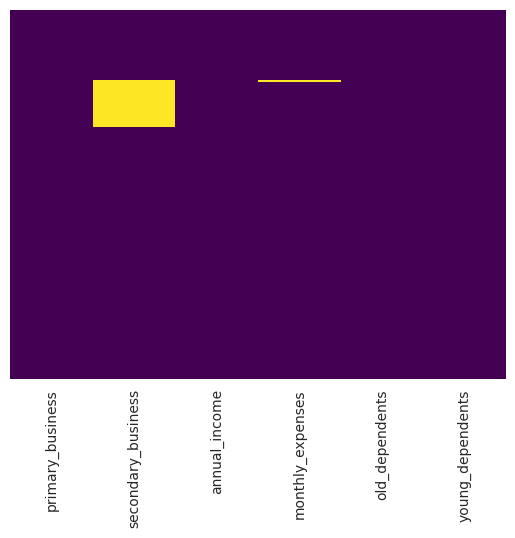

In [32]:
sns.heatmap(financial_details_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
financial_details_data.count()

primary_business      39974
secondary_business    34759
annual_income         40000
monthly_expenses      39880
old_dependents        40000
young_dependents      40000
dtype: int64

<Axes: xlabel='secondary_business', ylabel='count'>

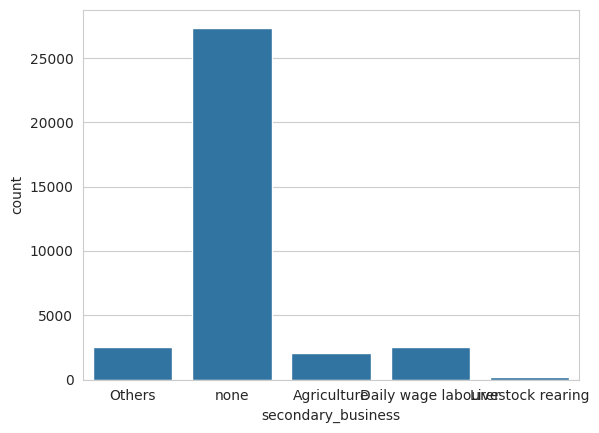

In [34]:
#Categorical Features
sns.set_style("whitegrid")
sns.countplot(financial_details_data,x='secondary_business')

**3.House Details**

In [35]:

#House Details: home_ownership, type_of_house, occupants_count, house_area, sanitary_availability,
#water_availability
house_details_data=pd.DataFrame(data,columns=["home_ownership","type_of_house","occupants_count",
                                             "house_area","sanitary_availability","water_availabity"])
house_details_data.tail()

,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity
39995,1.0,T2,2,600.0,1.0,1.0
39996,1.0,T2,4,800.0,1.0,1.0
39997,1.0,T2,3,600.0,1.0,1.0
39998,1.0,T2,4,600.0,1.0,1.0
39999,1.0,T2,4,600.0,1.0,1.0


In [36]:
house_details_data.describe()

,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity
count,39621.000000,40000.000000,40000.000000,39792.000000,34747.000000
mean,0.972489,26.641000,552.804750,0.686369,0.753216
std,0.163568,4749.995485,4596.921905,0.464028,0.255337
min,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,1.000000,2.000000,200.000000,0.000000,0.500000
50%,1.000000,3.000000,400.000000,1.000000,1.000000
75%,1.000000,4.000000,600.000000,1.000000,1.000000
max,1.000000,950000.000000,700000.000000,1.000000,1.000000


In [37]:
house_details_data.isna().sum()

home_ownership            379
type_of_house             694
occupants_count             0
house_area                  0
sanitary_availability     208
water_availabity         5253
dtype: int64

<Axes: >

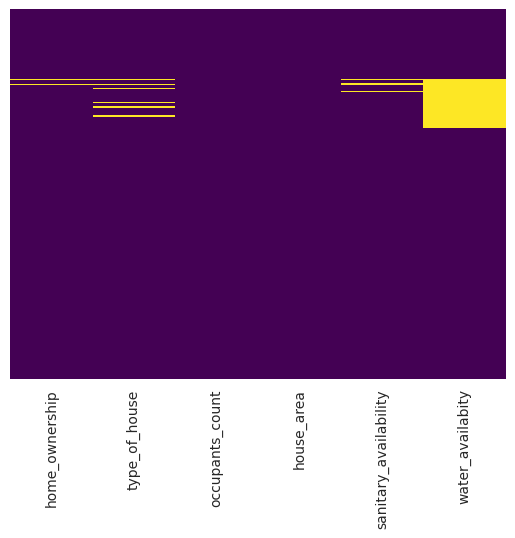

In [39]:
sns.heatmap(house_details_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [40]:
house_details_data.count()

home_ownership           39621
type_of_house            39306
occupants_count          40000
house_area               40000
sanitary_availability    39792
water_availabity         34747
dtype: int64

<Axes: xlabel='sanitary_availability', ylabel='count'>

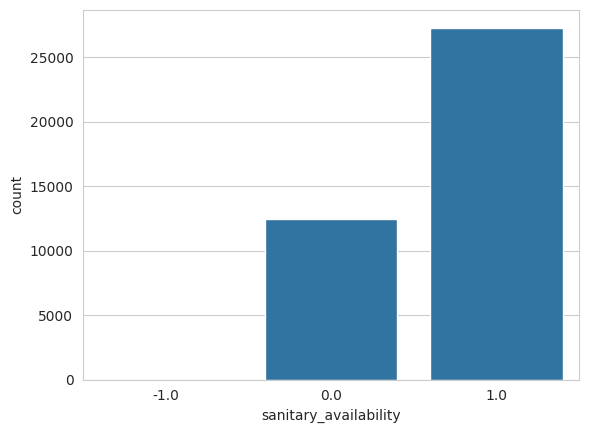

In [41]:
#Categorical Features

sns.set_style("whitegrid")
sns.countplot(x='sanitary_availability',data=house_details_data)

**4.Loan Details**

In [42]:
#Loan Details: loan_purpose, loan_tenure, loan_installments, loan_amount
#(these contain loan details of loans that have been previously given, and which have been repaid)

loan_details_data=pd.DataFrame(data,columns=["loan_purpose","loan_tenure","loan_installments","loan_amount"])
loan_details_data.head()

,loan_purpose,loan_tenure,loan_installments,loan_amount
0,Apparels,12,12,5000.0
1,Apparels,12,50,7500.0
2,Beauty Salon,12,12,5000.0
3,Apparels,12,50,7500.0
4,Retail Store,12,12,5000.0


In [43]:
loan_details_data.describe()

,loan_tenure,loan_installments,loan_amount
count,40000.000000,40000.000000,4.000000e+04
mean,12.032225,21.761175,8.412593e+03
std,1.367473,16.682458,1.359694e+04
min,3.000000,0.000000,1.000000e+02
25%,12.000000,12.000000,5.000000e+03
50%,12.000000,12.000000,8.000000e+03
75%,12.000000,50.000000,1.000000e+04
max,84.000000,84.000000,1.343000e+06


In [44]:
loan_details_data.isna().sum()

loan_purpose         26
loan_tenure           0
loan_installments     0
loan_amount           0
dtype: int64

<Axes: >

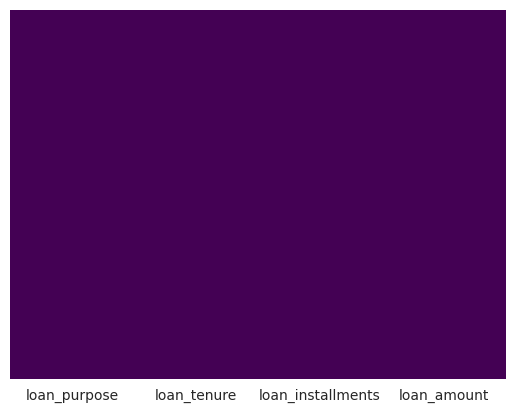

In [45]:
sns.heatmap(loan_details_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [46]:
loan_details_data.count()

loan_purpose         39974
loan_tenure          40000
loan_installments    40000
loan_amount          40000
dtype: int64

In [47]:
# Handling Missing Values
data.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [48]:
#Since in age features ,we have one record of 205,288 and 766105
#these are some kind of outliers and 788105 are mistyped age value.
#I am dropping these values as we have only 3 records.

data_outlier1=data.loc[data['age']==205]
data_outlier2=data.loc[data['age']==288]
data_outlier3=data.loc[data['age']==766105]

In [49]:
i = data[(data.age ==205)].index
j=data[(data.age==288)].index
k=data[(data.age==766105)].index

In [50]:
#deleting three records
data_updated1=data.drop(i)
data_updated2=data.drop(j)
data_updated2=data.drop(k)

In [51]:
data_updated2.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [52]:
data_updated3=data_updated2.copy()

In [53]:
data_updated3.head()


,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [54]:
#Handling missing values with mean and mode
data_updated3['social_class']=data_updated3['social_class'].fillna(data_updated3['social_class'].mode()[0])
data_updated3['city']=data_updated3['city'].fillna(data_updated3['city'].mode()[0])
data_updated3['primary_business']=data_updated3['primary_business'].fillna(data_updated3['primary_business'].mode()[0])
data_updated3['secondary_business']=data_updated3['secondary_business'].fillna(data_updated3['secondary_business'].mode()[0])
data_updated3['type_of_house']=data_updated3['type_of_house'].fillna(data_updated3['type_of_house'].mode()[0])
data_updated3['sanitary_availability']=data_updated3['sanitary_availability'].fillna(data_updated3['sanitary_availability'].mode()[0])
data_updated3['water_availabity']=data_updated3['water_availabity'].fillna(data_updated3['water_availabity'].mode()[0])
data_updated3['loan_purpose']=data_updated3['loan_purpose'].fillna(data_updated3['loan_purpose'].mode()[0])
data_updated3['monthly_expenses']=data_updated3['monthly_expenses'].fillna(data_updated3['monthly_expenses'].mean())
data_updated3['home_ownership']=data_updated3['home_ownership'].fillna(data_updated3['home_ownership'].mode()[0])

In [60]:
data_updated3.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,Pusad,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [55]:
data_updated3.isna().sum()

Id                       0
city                     0
age                      0
sex                      0
social_class             0
primary_business         0
secondary_business       0
annual_income            0
monthly_expenses         0
old_dependents           0
young_dependents         0
home_ownership           0
type_of_house            0
occupants_count          0
house_area               0
sanitary_availability    0
water_availabity         0
loan_purpose             0
loan_tenure              0
loan_installments        0
loan_amount              0
dtype: int64

In [56]:
data_updated3.shape

(39999, 21)

In [57]:
x=data_updated3.iloc[:,1:20]
x.head()

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments
0,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12
1,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50
2,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12
3,Pusad,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50
4,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12


In [58]:
x.shape

(39999, 19)

In [59]:
y=data_updated3.iloc[:,-1]
y.head()

0    5000.0
1    7500.0
2    5000.0
3    7500.0
4    5000.0
Name: loan_amount, dtype: float64

In [64]:
data_x=pd.DataFrame(data_updated3,columns=["Id","age","sex","annual_income",
                                     "monthly_expenses","old_dependents","young_dependents","home_ownership","type_of_house",
                                     "occupants_count","house_area","loan_tenure","loan_installments"])

In [65]:
data_x.head()

,Id,age,sex,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,loan_tenure,loan_installments
0,1,22,F,36000.0,5000.0,0,2,1.0,R,4,70.0,12,12
1,2,21,F,94000.0,3600.0,1,1,1.0,T1,4,80.0,12,50
2,3,24,M,48000.0,4000.0,0,2,1.0,T1,4,50.0,12,12
3,4,26,F,7000.0,5000.0,0,2,1.0,T1,5,50.0,12,50
4,5,23,F,36000.0,3500.0,0,0,1.0,T1,1,112.0,12,12


In [71]:
data1=pd.DataFrame(data_X,columns=["type_of_house","sex"])
data2= pd.get_dummies(data1.type_of_house,prefix='type_of_house',drop_first=True).astype(int)

In [72]:
#performing one hot encoding on the feature CourseInstructor
data3 = pd.get_dummies(data1.sex, prefix='sex',drop_first=True).astype(int)

In [73]:
data6=pd.concat([data2,data3],axis=1)
data6.head()

,type_of_house_T1,type_of_house_T2,sex_M,sex_TG
0,0,0,0,0
1,1,0,0,0
2,1,0,1,0
3,1,0,0,0
4,1,0,0,0


In [75]:
data7=pd.concat([data_x,data6],axis=1)
data7.head()

,Id,age,sex,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,loan_tenure,loan_installments,type_of_house_T1,type_of_house_T2,sex_M,sex_TG
0,1,22,F,36000.0,5000.0,0,2,1.0,R,4,70.0,12,12,0,0,0,0
1,2,21,F,94000.0,3600.0,1,1,1.0,T1,4,80.0,12,50,1,0,0,0
2,3,24,M,48000.0,4000.0,0,2,1.0,T1,4,50.0,12,12,1,0,1,0
3,4,26,F,7000.0,5000.0,0,2,1.0,T1,5,50.0,12,50,1,0,0,0
4,5,23,F,36000.0,3500.0,0,0,1.0,T1,1,112.0,12,12,1,0,0,0


In [78]:
x=pd.DataFrame(data7,columns=["old_dependents","loan_installments","loan_tenure","home_ownership",
                       "young_dependents","monthly_expenses","annual_income","age","house_area","Id",
                       "occupants_count","type_of_house_T1","type_of_house_T2","sex_M","sex_TG"])

In [79]:
x.head()

,old_dependents,loan_installments,loan_tenure,home_ownership,young_dependents,monthly_expenses,annual_income,age,house_area,Id,occupants_count,type_of_house_T1,type_of_house_T2,sex_M,sex_TG
0,0,12,12,1.0,2,5000.0,36000.0,22,70.0,1,4,0,0,0,0
1,1,50,12,1.0,1,3600.0,94000.0,21,80.0,2,4,1,0,0,0
2,0,12,12,1.0,2,4000.0,48000.0,24,50.0,3,4,1,0,1,0
3,0,50,12,1.0,2,5000.0,7000.0,26,50.0,4,5,1,0,0,0
4,0,12,12,1.0,0,3500.0,36000.0,23,112.0,5,1,1,0,0,0


In [80]:
x.shape

(39999, 15)

In [81]:
x.isna().sum()

old_dependents       0
loan_installments    0
loan_tenure          0
home_ownership       0
young_dependents     0
monthly_expenses     0
annual_income        0
age                  0
house_area           0
Id                   0
occupants_count      0
type_of_house_T1     0
type_of_house_T2     0
sex_M                0
sex_TG               0
dtype: int64

In [82]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39999 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   old_dependents     39999 non-null  int64  
 1   loan_installments  39999 non-null  int64  
 2   loan_tenure        39999 non-null  int64  
 3   home_ownership     39999 non-null  float64
 4   young_dependents   39999 non-null  int64  
 5   monthly_expenses   39999 non-null  float64
 6   annual_income      39999 non-null  float64
 7   age                39999 non-null  int64  
 8   house_area         39999 non-null  float64
 9   Id                 39999 non-null  int64  
 10  occupants_count    39999 non-null  int64  
 11  type_of_house_T1   39999 non-null  int64  
 12  type_of_house_T2   39999 non-null  int64  
 13  sex_M              39999 non-null  int64  
 14  sex_TG             39999 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 4.9 MB


In [83]:
y=pd.DataFrame(data_updated3,columns=['loan_amount'])

In [84]:
y.shape

(39999, 1)

In [87]:
from sklearn.ensemble import ExtraTreesRegressor

In [88]:
model=ExtraTreesRegressor()

In [89]:
model.fit(x,y)

<ipython-input-89-cecb4634e72d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y)


ExtraTreesRegressor()

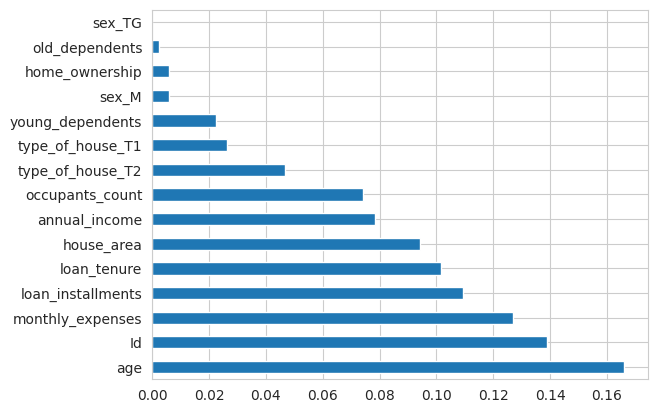

In [90]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()


In [92]:
from sklearn.model_selection import train_test_split

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

**Model Evaluation**

In [100]:
prediction=regressor.predict(x_test)

In [101]:
prediction

array([[6601.25849198],
       [6055.02039239],
       [5941.20332308],
       ...,
       [8233.44057231],
       [8073.65833289],
       [7218.7119977 ]])

In [102]:
data_prediction=pd.DataFrame(prediction,columns=["Predicted_loan_amount"])
data_prediction.head()


,Predicted_loan_amount
0,6601.258492
1,6055.020392
2,5941.203323
3,5687.549364
4,9737.819776


In [103]:
data_prediction.shape

(12000, 1)

In [104]:
y_test.shape

(12000, 1)

In [105]:
y_test.head()

,loan_amount
12837,5000.0
10914,3000.0
4214,5000.0
8198,2000.0
29127,10000.0


In [106]:
y_test1=y_test.copy()

In [108]:
y_test1=y_test1.reset_index()
y_test2=pd.DataFrame(y_test1,columns=["loan_amount"])
y_test2.head()


,loan_amount
0,5000.0
1,3000.0
2,5000.0
3,2000.0
4,10000.0


In [109]:
df_row_merged = pd.concat([data_prediction,y_test2],axis=1)
df_row_merged.head(10)


,Predicted_loan_amount,loan_amount
0,6601.258492,5000.0
1,6055.020392,3000.0
2,5941.203323,5000.0
3,5687.549364,2000.0
4,9737.819776,10000.0
5,6801.569466,5000.0
6,10726.570871,15000.0
7,6259.577866,7500.0
8,9554.410648,12000.0
9,11046.660947,8000.0


<Axes: >

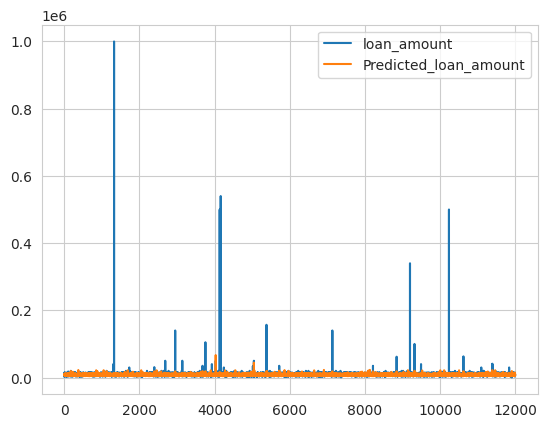

In [110]:
df_row_merged[['loan_amount','Predicted_loan_amount']].plot()

In [111]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 2282.4504939622716
MSE: 166992843.86178863
RMSE: 12922.571101053716


In [112]:
#df_row_merged_randomforest.head()
df_row_merged['error_rate']=(abs(df_row_merged['loan_amount']-df_row_merged['Predicted_loan_amount'])/df_row_merged['loan_amount'])*100


In [113]:

df_row_merged.head()


,Predicted_loan_amount,loan_amount,error_rate
0,6601.258492,5000.0,32.025170
1,6055.020392,3000.0,101.834013
2,5941.203323,5000.0,18.824066
3,5687.549364,2000.0,184.377468
4,9737.819776,10000.0,2.621802


In [114]:
#mean error rate
linear_mean_error=df_row_merged.error_rate.mean()
#calculating accuracy
mean_accuracy=100-linear_mean_error
mean_accuracy

71.71681090049397